Using SVD for latent features

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import sqrtm
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Caricamento dei dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Esplorazione dei dataset
print("Movies dataset:\n", movies.head())
print("Ratings dataset:\n", ratings.head())

Movies dataset:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Ratings dataset:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [2]:
# Creazione della matrice utente-film
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print("User-movie matrix:\n", user_movie_matrix.head())

User-movie matrix:
 movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0  

In [3]:
# Conversione in matrice sparsa
sparse_user_movie_matrix = csr_matrix(user_movie_matrix.values)
print("Sparse user-movie matrix:\n", sparse_user_movie_matrix)

Sparse user-movie matrix:
   (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0


In [4]:
# Applicazione di SVD
U, sigma, Vt = svds(sparse_user_movie_matrix, k=20)  # k: numero di feature latenti

In [ ]:
#printa la matrice U (utenti-feature latenti) magari solo i primi dieci campioni
print("U:\n", U[:10])

In [ ]:
# # Visualizzazione della distribuzione delle feature latenti degli utenti
# plt.figure(figsize=(10, 6))
# for i in range(min(5, U.shape[1])):  # Mostra le prime 5 feature latenti
#     plt.hist(U[:, i], bins=30, alpha=0.6, label=f'Feature {i+1}')
# plt.title('Distribuzione delle feature latenti degli utenti (U)')
# plt.xlabel('Valori delle feature latenti')
# plt.ylabel('Frequenza')
# plt.legend()
# plt.show()

In [5]:
# E' necessario questo?
sigma = np.diag(sigma)

root_sigma = sqrtm(sigma)

U = np.dot(U, root_sigma)

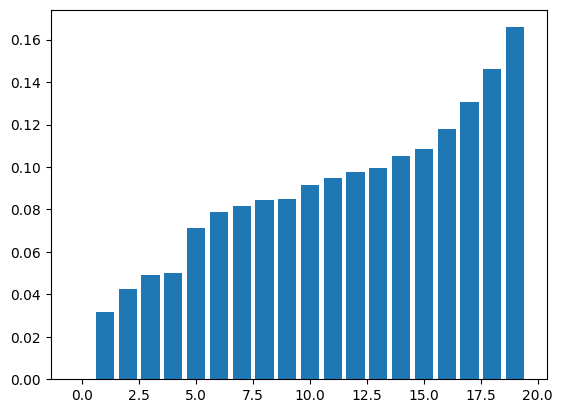

In [6]:
utente = 2
#printare barplot dell'utente 0 della matrice U.
#scalare prima i valori della matrice U per renderli tutti positivi
#e poi fare il barplot per l'utente 0
import matplotlib.pyplot as plt
#ordina la matrice U in modo crescente

U = np.sort(U)
U_scaled = U[utente] - U[utente].min()
# U_scaled /= U_scaled.max()
plt.bar(range(20), U_scaled)
plt.show()

In [ ]:
# Ricostruzione approssimata della matrice utente-film
approx_user_movie_matrix = np.dot(np.dot(U, sigma), Vt)

# Normalizzazione per riportare i valori alle scale originali (facoltativo)
user_movie_predictions = pd.DataFrame(approx_user_movie_matrix, columns=user_movie_matrix.columns)

# Output della matrice predetta
print("Matrice predetta:\n", user_movie_predictions.head())

In [ ]:
# Mappatura movieId -> genres
movie_genres = movies.set_index('movieId')['genres']

# Calcolo della similarità coseno tra le feature latenti dei film
movie_features = Vt.T  # Feature latenti dei film
cosine_sim = cosine_similarity(movie_features)

# Creazione di una mappatura movieId -> indice nella matrice
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(user_movie_matrix.columns)}

# Verifica della correlazione tra similarità e generi
similar_movies = {}
for movie_id, genre in movie_genres.items():
    if movie_id in movie_id_to_index:
        idx = movie_id_to_index[movie_id]
        similar_indices = np.argsort(-cosine_sim[idx])[:10]  # Top 10 simili
        similar_movies[movie_id] = [(user_movie_matrix.columns[sim_idx], movie_genres.get(user_movie_matrix.columns[sim_idx], "Unknown")) for sim_idx in similar_indices if user_movie_matrix.columns[sim_idx] in movie_genres.index]

# Output dei risultati
print("Film simili in base alle feature latenti:\n")
for movie_id, similars in list(similar_movies.items())[:5]:  # Mostra i primi 5 risultati
    print(f"Film: {movies.loc[movies['movieId'] == movie_id, 'title'].values[0]} ({movie_genres[movie_id]})")
    for sim_movie_id, sim_genre in similars:
        print(f"  Simile a: {movies.loc[movies['movieId'] == sim_movie_id, 'title'].values[0]} ({sim_genre})")
    print()